In [46]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import trompy as tp

from scipy import stats

import dill

rcParams['font.family'] = 'Arial'
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]

savefigs = True

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")
FIGSFOLDER = Path("C:/Users/jmc010/Dropbox/Publications in Progress/Bazzino Roitman_sodium/figs")

In [5]:
with open(DATAFOLDER / "x_array_2clusters_alltrials.pickle", "rb") as f:
    x_array = dill.load(f)

In [6]:
with open(DATAFOLDER / "snips_data_selected_conditions.pickle", "rb") as f:
    data = dill.load(f)

snips_10NaCl = data["snips_10NaCl_selected"]
snips_45NaCl = data["snips_45NaCl_selected"]

snips_all = np.vstack([snips_10NaCl, snips_45NaCl])
snips_all.shape

(1967, 200)

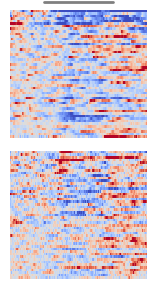

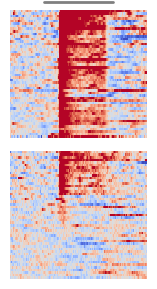

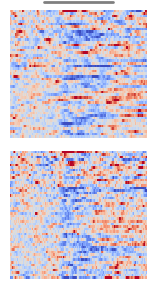

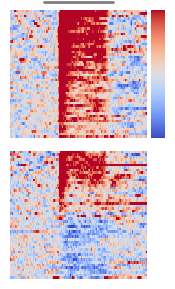

In [133]:
savefigs = False

def get_heatmap_data(snips, x_array, condition, sex, infusiontype):
    query_string = "condition == @condition & sex == @sex & infusiontype == @infusiontype"

    heatmap_data = []
    df = x_array.query(query_string)
    for trial in df.trial.unique():
        tmp_snips = snips_all[df.query("trial == @trial").index]
        mean_snip = np.mean(tmp_snips, axis=0)
        heatmap_data.append(mean_snip)
        
    return np.array(heatmap_data)

def init_figure():
    f = plt.figure(figsize=(2, 3.5))
    gs = f.add_gridspec(2, 2, hspace=0.1, wspace=0.05, width_ratios=[10, 1])
    
    ax1 = f.add_subplot(gs[0, 0])
    ax2 = f.add_subplot(gs[1, 0])
    cbar_ax = f.add_subplot(gs[0, 1])
    
    return f, ax1, ax2, cbar_ax

def make_heatmap(data, ax, vlim, cbar_ax=None, inf_bar=False):
    
    if cbar_ax is not None:
        cbar=True
    else:
        cbar=False
        
    sns.heatmap(np.array(data),
                cmap="coolwarm",
                ax=ax,
                cbar=cbar,
                cbar_ax=cbar_ax,
                vmin=-vlim, vmax=vlim
                )
    
    if cbar_ax is not None:
        cbar_ax.set_yticks([])
    
    if inf_bar:
        ax.plot([50,150], [-3, -3], color="black", lw=2, alpha=0.5, clip_on=False)
        
    ax.set_xticks([])
    ax.set_yticks([])

vlim = 1

# female, replete
f, ax1, ax2, cbar_ax = init_figure()

heatmap_data = get_heatmap_data(snips_all, x_array, "replete", "F", "10NaCl")
f_replete_10_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax1, vlim, inf_bar=True)

heatmap_data = get_heatmap_data(snips_all, x_array, "replete", "F", "45NaCl")
f_replete_45_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax2, vlim)

cbar_ax.remove()

if savefigs:
    f.savefig(FIGSFOLDER / "heatmap_female_replete.pdf", dpi=600, transparent=True)

# # female, deplete
f, ax1, ax2, cbar_ax = init_figure()

heatmap_data = get_heatmap_data(snips_all, x_array, "deplete", "F", "10NaCl")
f_deplete_10_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax1, vlim, inf_bar=True)

heatmap_data = get_heatmap_data(snips_all, x_array, "deplete", "F", "45NaCl")
f_deplete_45_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax2, vlim)
cbar_ax.remove()

if savefigs:
    f.savefig(FIGSFOLDER / "heatmap_female_deplete.pdf", dpi=600, transparent=True)
    

# # male, replete
f, ax1, ax2, cbar_ax = init_figure()

heatmap_data = get_heatmap_data(snips_all, x_array, "replete", "M", "10NaCl")
m_replete_10_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax1, vlim, inf_bar=True)

heatmap_data = get_heatmap_data(snips_all, x_array, "replete", "M", "45NaCl")
m_replete_45_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax2, vlim)

cbar_ax.remove()

if savefigs:
    f.savefig(FIGSFOLDER / "heatmap_male_replete.pdf", dpi=600, transparent=True)

# male, deplete
f, ax1, ax2, cbar_ax = init_figure()

heatmap_data = get_heatmap_data(snips_all, x_array, "deplete", "M", "10NaCl")
m_deplete_10_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax1, vlim, inf_bar=True)

heatmap_data = get_heatmap_data(snips_all, x_array, "deplete", "M", "45NaCl")
m_deplete_45_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax2, vlim, cbar_ax=cbar_ax)

if savefigs:
    f.savefig(FIGSFOLDER / "heatmap_male_deplete.pdf", dpi=600, transparent=True)

C:\Users\jmc010\AppData\Local\Temp\ipykernel_1844\2986952072.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_1844\2986952072.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_1844\2986952072.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_1844\2986952072.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))


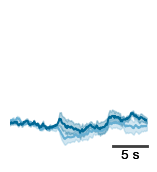

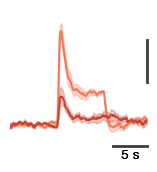

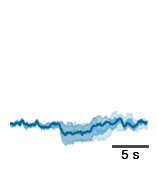

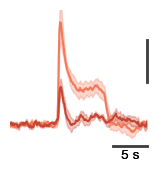

In [89]:
def get_mean_snips(snips, x_array, sex, condition):

    query_string = "condition == @condition & sex == @sex"

    snips_10, snips_45 = [], []
    for id in x_array.query(query_string + " & infusiontype == '10NaCl'").id.unique():
        snips_10.append(np.mean(snips_all[x_array.query(query_string + " & id == @id").index], axis=0))
    for id in x_array.query(query_string + " & infusiontype == '45NaCl'").id.unique():
        snips_45.append(np.mean(snips_all[x_array.query(query_string + " & id == @id").index], axis=0))
        
    return np.array(snips_10), np.array(snips_45)

def init_figure():
    f = plt.figure(figsize=(2, 2))
    gs = f.add_gridspec(1, 2, hspace=0.1, wspace=0.05, width_ratios=[10, 1], bottom=0.2)
    ax = f.add_subplot(gs[0, 0])
    
    return f, ax
    
def plot_snips(snips_10, snips_45, ax, colors_10, colors_45, ylims, scalebar=False):
    for snips, col in zip([snips_10, snips_45], [colors_10, colors_45]):
        x = np.arange(snips.shape[1]) / 10
        mean = np.mean(snips, axis=0)
        sd = np.std(snips, axis=0)
        sem = sd / np.sqrt(snips.shape[0])
        
        ax.plot(x, mean, color=col, lw=1.5)
        ax.fill_between(x, mean-sem, mean+sem, alpha=0.3, color=col)
        
        sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.set_xlim([0, 20])
        ax.set_ylim(ylims)
        ax.plot([15,20], [ylims[0], ylims[0]], color="black", lw=2, alpha=0.5, clip_on=False)
        ax.text(17.5, ylims[0]-0.1, "5 s", ha="center", va="top", fontsize=10)
        
        if scalebar:
            ax.plot([20, 20], [1, 2], color="black", lw=2, alpha=0.5, clip_on=False)
    
    
    
def get_auc(snips):
    auc = []
    for snip in snips:
        auc.append(np.trapz(snip[50:150]))
    return np.array(auc)

ylims = [-0.5, 2.7]

# female, replete
f, ax = init_figure()

snips_10, snips_45 = get_mean_snips(snips_all, x_array, "F", "replete")
plot_snips(snips_10, snips_45, ax, colors[0], colors[1], ylims)
f_replete_aucs = [get_auc(snips_10), get_auc(snips_45)]

if savefigs:
    f.savefig(FIGSFOLDER / "snips_female_replete.pdf", dpi=600, transparent=True)

# female, deplete
f, ax = init_figure()

snips_10, snips_45 = get_mean_snips(snips_all, x_array, "F", "deplete")
plot_snips(snips_10, snips_45, ax, colors[2], colors[3], ylims, scalebar=True)
f_deplete_aucs = [get_auc(snips_10), get_auc(snips_45)]

if savefigs:
    f.savefig(FIGSFOLDER / "snips_female_deplete.pdf", dpi=600, transparent=True)
    
# male, replete
f, ax = init_figure()

snips_10, snips_45 = get_mean_snips(snips_all, x_array, "M", "replete")
plot_snips(snips_10, snips_45, ax, colors[0], colors[1], ylims)
m_replete_aucs = [get_auc(snips_10), get_auc(snips_45)]

if savefigs:
    f.savefig(FIGSFOLDER / "snips_male_replete.pdf", dpi=600, transparent=True)

# male, deplete
f, ax = init_figure()

snips_10, snips_45 = get_mean_snips(snips_all, x_array, "M", "deplete")
plot_snips(snips_10, snips_45, ax, colors[2], colors[3], ylims, scalebar=True)
m_deplete_aucs = [get_auc(snips_10), get_auc(snips_45)]

if savefigs:
    f.savefig(FIGSFOLDER / "snips_male_deplete.pdf", dpi=600, transparent=True)



In [91]:
f_replete_aucs

[array([ 11.47118152, -11.6083844 , -37.44903718, -18.25885519,
        -25.75216808]),
 array([ 26.27179157,  12.17698107, -33.80129067, -13.45001751,
        -11.18947205])]

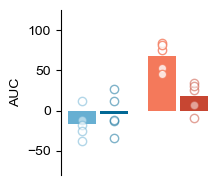

In [112]:
f, ax = plt.subplots(figsize=(2.2, 2.2),
                     gridspec_kw={"left": 0.25, "right": 0.95, "top": 0.95, "bottom": 0.2})


aucs = [f_replete_aucs, f_deplete_aucs]
barx = [1, 2]
barwidth=0.35

spacer = 0.2
ax.bar(barx[0] - spacer, np.mean(aucs[0][0]), color=colors[0], width=barwidth)
ax.bar(barx[0] + spacer, np.mean(aucs[0][1]), color=colors[1], width=barwidth)

ax.bar(barx[1] - spacer, np.mean(aucs[1][0]), color=colors[2], width=barwidth)
ax.bar(barx[1] + spacer, np.mean(aucs[1][1]), color=colors[3], width=barwidth)

ax.scatter([barx[0] - spacer]*len(aucs[0][0]), aucs[0][0], facecolors="white", edgecolors=colors[0], alpha=0.5)
ax.scatter([barx[0] + spacer]*len(aucs[0][1]), aucs[0][1], facecolors="white", edgecolors=colors[1], alpha=0.5)
ax.scatter([barx[1] - spacer]*len(aucs[1][0]), aucs[1][0], facecolors="white", edgecolors=colors[2], alpha=0.8)
ax.scatter([barx[1] + spacer]*len(aucs[1][1]), aucs[1][1], facecolors="white", edgecolors=colors[3], alpha=0.5)

sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)
ax.set_xticks([])
ax.set_yticks([-50, 0, 50, 100])
ax.set_ylim([-80,125])

ax.set_ylabel("AUC", fontsize=10)

if savefigs:
    f.savefig(FIGSFOLDER / "aucs_female.pdf", dpi=600, transparent=True)


(np.float64(-80.0), np.float64(125.0))

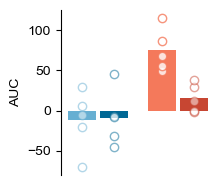

In [113]:
f, ax = plt.subplots(figsize=(2.2, 2.2),
                     gridspec_kw={"left": 0.25, "right": 0.95, "top": 0.95, "bottom": 0.2})


aucs = [m_replete_aucs, m_deplete_aucs]
barx = [1, 2]
barwidth=0.35

spacer = 0.2
ax.bar(barx[0] - spacer, np.mean(aucs[0][0]), color=colors[0], width=barwidth)
ax.bar(barx[0] + spacer, np.mean(aucs[0][1]), color=colors[1], width=barwidth)

ax.bar(barx[1] - spacer, np.mean(aucs[1][0]), color=colors[2], width=barwidth)
ax.bar(barx[1] + spacer, np.mean(aucs[1][1]), color=colors[3], width=barwidth)

ax.scatter([barx[0] - spacer]*len(aucs[0][0]), aucs[0][0], facecolors="white", edgecolors=colors[0], alpha=0.5)
ax.scatter([barx[0] + spacer]*len(aucs[0][1]), aucs[0][1], facecolors="white", edgecolors=colors[1], alpha=0.5)
ax.scatter([barx[1] - spacer]*len(aucs[1][0]), aucs[1][0], facecolors="white", edgecolors=colors[2], alpha=0.8)
ax.scatter([barx[1] + spacer]*len(aucs[1][1]), aucs[1][1], facecolors="white", edgecolors=colors[3], alpha=0.5)

sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)
ax.set_xticks([])
ax.set_yticks([-50, 0, 50, 100])
ax.set_ylim([-80,125])

ax.set_ylabel("AUC", fontsize=10)

if savefigs:
    f.savefig(FIGSFOLDER / "aucs_male.pdf", dpi=600, transparent=True)
    
ax.get_ylim()

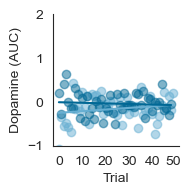

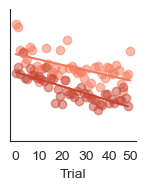

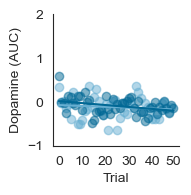

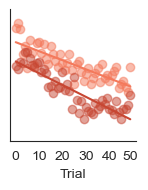

In [157]:
savefigs = True

def draw_regression_line(y, ax, color):
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_fit = slope * x + intercept
    ax.plot(x, y_fit, color=color, lw=1.5)
    
    return slope, intercept

def make_correlation_plot(inf10, inf45, col10, col45, yaxis=False):
    
    f, ax = plt.subplots(figsize=(1.8,1.8),
                         gridspec_kw={"left": 0.25, "right": 0.95, "top": 0.95, "bottom": 0.22})

    ax.scatter(np.arange(len(inf10)), inf10, color=col10, alpha=0.5)
    ax.scatter(np.arange(len(inf45)), inf45, color=col45, alpha=0.5)

    draw_regression_line(inf10, ax, col10)
    draw_regression_line(inf45, ax, col45)

    sns.despine(ax=ax)

    ax.set_ylim([-1, 2])
    
    if yaxis:
        ax.set_yticks([-1, 0, 1, 2])
        ax.set_ylabel("Dopamine (AUC)")
    else:
        ax.set_yticks([])
    
    
    ax.set_xticks([0, 10, 20, 30, 40, 49], labels=["0", "10", "20", "30", "40", "50"])
    ax.set_xlabel("Trial")
    
    return f
    
f = make_correlation_plot(f_replete_10_inf, f_replete_45_inf, colors[0], colors[1], yaxis=True)
if savefigs:
    f.savefig(FIGSFOLDER / "correlation_f_replete.pdf", dpi=600, transparent=True)
    
f = make_correlation_plot(f_deplete_10_inf, f_deplete_45_inf, colors[2], colors[3])
if savefigs:
    f.savefig(FIGSFOLDER / "correlation_f_deplete.pdf", dpi=600, transparent=True)
    
f = make_correlation_plot(m_replete_10_inf, m_replete_45_inf, colors[0], colors[1], yaxis=True)
if savefigs:
    f.savefig(FIGSFOLDER / "correlation_m_replete.pdf", dpi=600, transparent=True)
    
f = make_correlation_plot(m_deplete_10_inf, m_deplete_45_inf, colors[2], colors[3])
if savefigs:
    f.savefig(FIGSFOLDER / "correlation_m_deplete.pdf", dpi=600, transparent=True)


In [124]:
x

246     0
247     1
248     2
249     3
250     4
       ..
489    45
490    46
491    47
492    48
493    49
Name: trial, Length: 248, dtype: int64

In [118]:
snips_all.shape

(1967, 200)